Task 1 - Step 1: 批量加载 2010–2019 年 MODIS 火点数据

TASK1 workflow: 读取文件—-统计每月点火数量（按照10年平均值）（条形图或者热力图）--得到seasonalandmonthly --统计每周点火数量（条形图或者热力图）--得到weeekly---合并月度和地理位置--得到geographic

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import glob  # 用于匹配多个文件
import os


data_set = r'D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data' 
csv_files = sorted(glob.glob(os.path.join(data_set, 'modis_*_China.csv')))

print(f"找到 {len(csv_files)} 个文件：")
for f in csv_files:
    print(f"  - {os.path.basename(f)}")

dfs = []

for file in csv_files:
    print(f"正在读取: {file}")
    df = pd.read_csv(file)
    
    # 提取年份（从文件名中获取，如 modis_2015_China.csv → year=2015）
    year = os.path.basename(file).split('_')[1]  # 取 '2015'
    df['source_year'] = year  # 标记来源年份
    
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
print(f"\n 合并完成！总记录数: {len(df_all):,}")

找到 10 个文件：
  - modis_2010_China.csv
  - modis_2011_China.csv
  - modis_2012_China.csv
  - modis_2013_China.csv
  - modis_2014_China.csv
  - modis_2015_China.csv
  - modis_2016_China.csv
  - modis_2017_China.csv
  - modis_2018_China.csv
  - modis_2019_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2010_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2011_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2012_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2013_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2014_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2015_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I Data\Satellite Fire Data\modis_2016_China.csv
正在读取: D:\研究生\CNGF5020\mini pro\Mini Group Project I D

Task 1 - Step 2: 提取年月周
 tip：题目没有要求具体时间 这里先不做处理

In [2]:
df_all['acq_date']=pd.to_datetime(df_all['acq_date'])#acq_date原本是str要先修改成datetime类型才能提取
df_all['year'] = df_all['acq_date'].dt.year
df_all['month'] = df_all['acq_date'].dt.month
df_all['week_of_year'] = df_all['acq_date'].dt.isocalendar().week.astype(int)

def get_season(month):
    if month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    elif month in [9,10,11]: return 'Autumn'
    else: return 'Winter'

df_all['season'] = df_all['month'].apply(get_season)

step3：统计每月火点，每季度火点
没用到sns

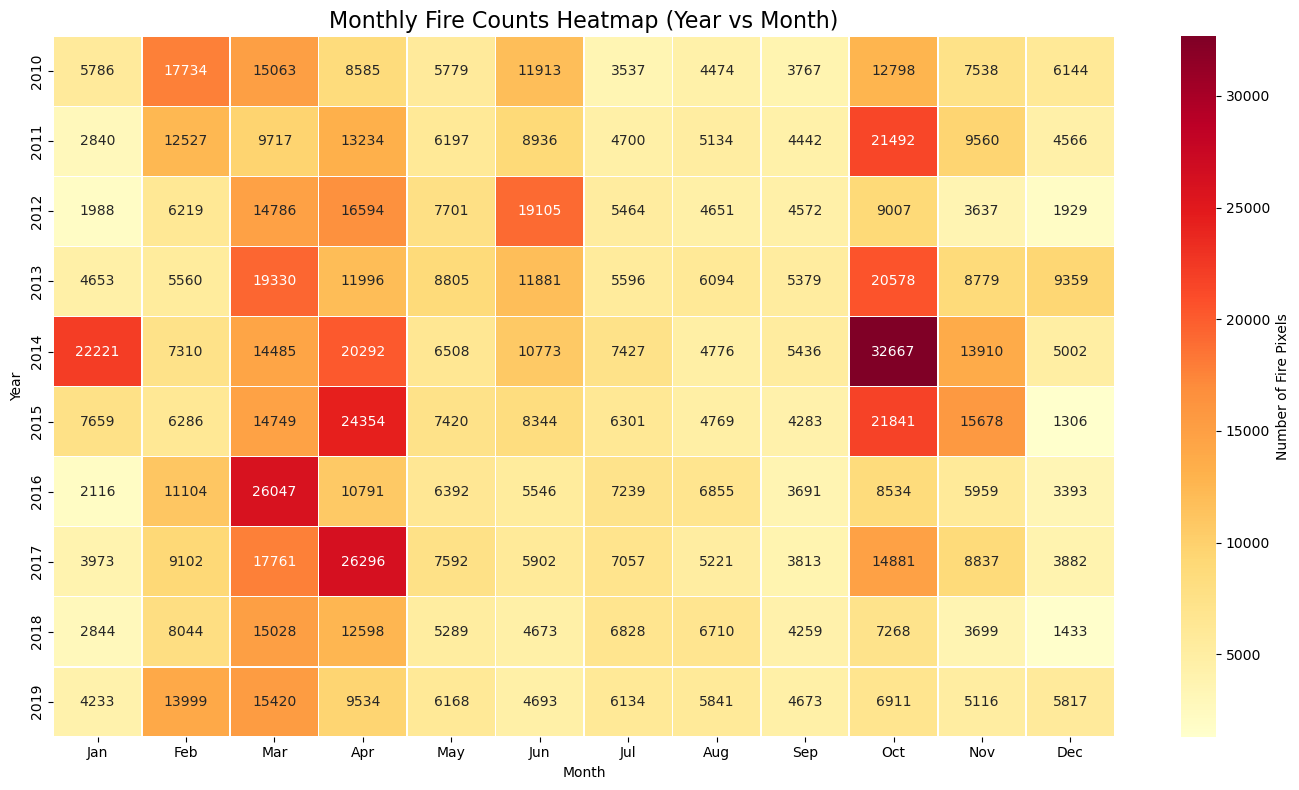

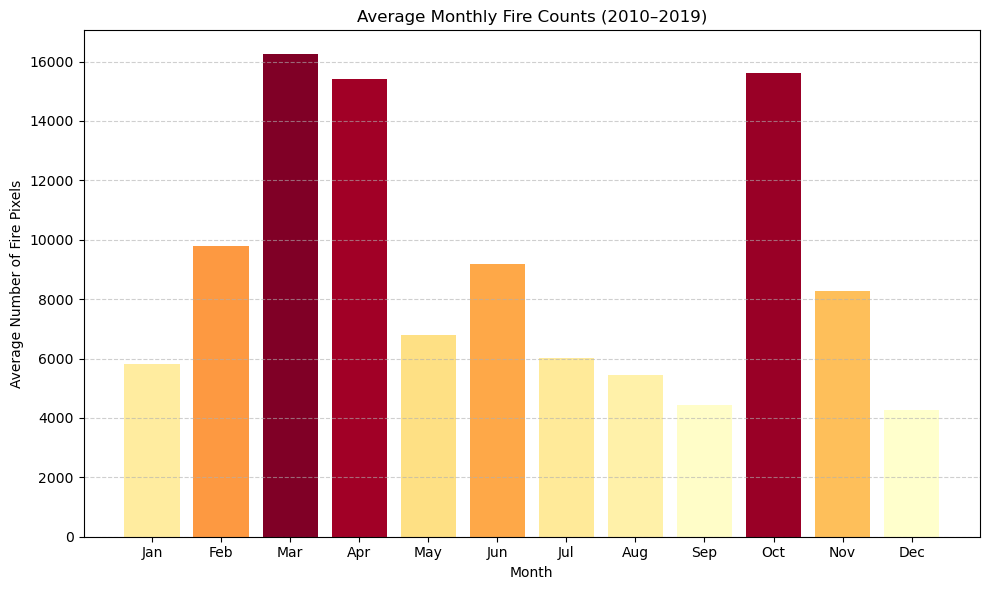


 it can be seen that march,april and october is the top 3 month fire happened
 2,6,11月次之


In [3]:
monthly_counts = df_all.groupby(['year', 'month']).size().reset_index(name='count')
monthly_avg = monthly_counts.groupby('month')['count'].mean()

#热力图
heatmap_data = monthly_counts.pivot(index='year', columns='month', values='count').fillna(0)

months_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data.columns = months_name

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    linewidths=.5,
    cbar_kws={'label': 'Number of Fire Pixels'},
    annot=True, # 显示每个单元格的具体数值
    fmt="d" # 格式化字符串，显示整数
)

plt.title('Monthly Fire Counts Heatmap (Year vs Month)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig('monthly_fire_counts_heatmap.png')


#条形图
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
counts = monthly_avg.values

norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.YlOrRd(norm(counts))  # 使用 YlOrRd 映射

plt.figure(figsize=(10, 6))
bars = plt.bar(months, counts, color=colors)
plt.title('Average Monthly Fire Counts (2010–2019)')
plt.xlabel('Month')
plt.ylabel('Average Number of Fire Pixels')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('average_monthly_fire_counts——barchart.png')


plt.show()

print("\n it can be seen that march,april and october is the top 3 month fire happened\n 2,6,11月次之")

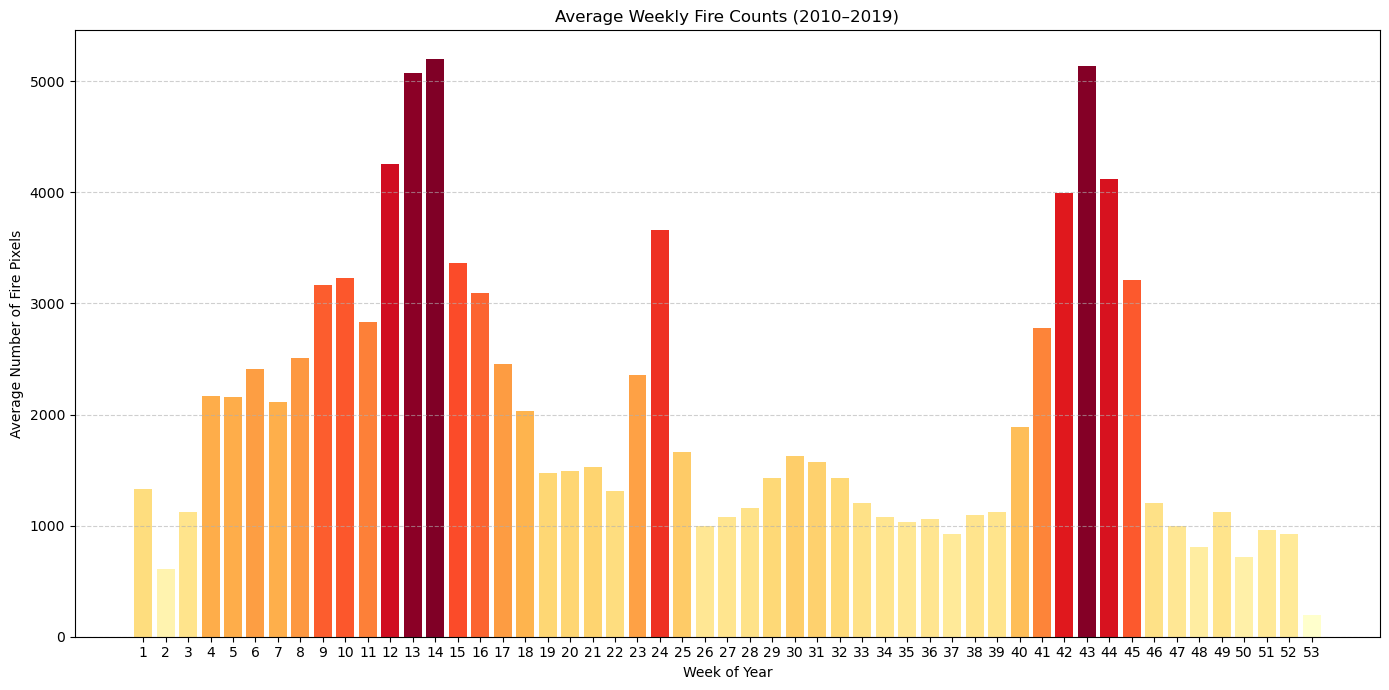

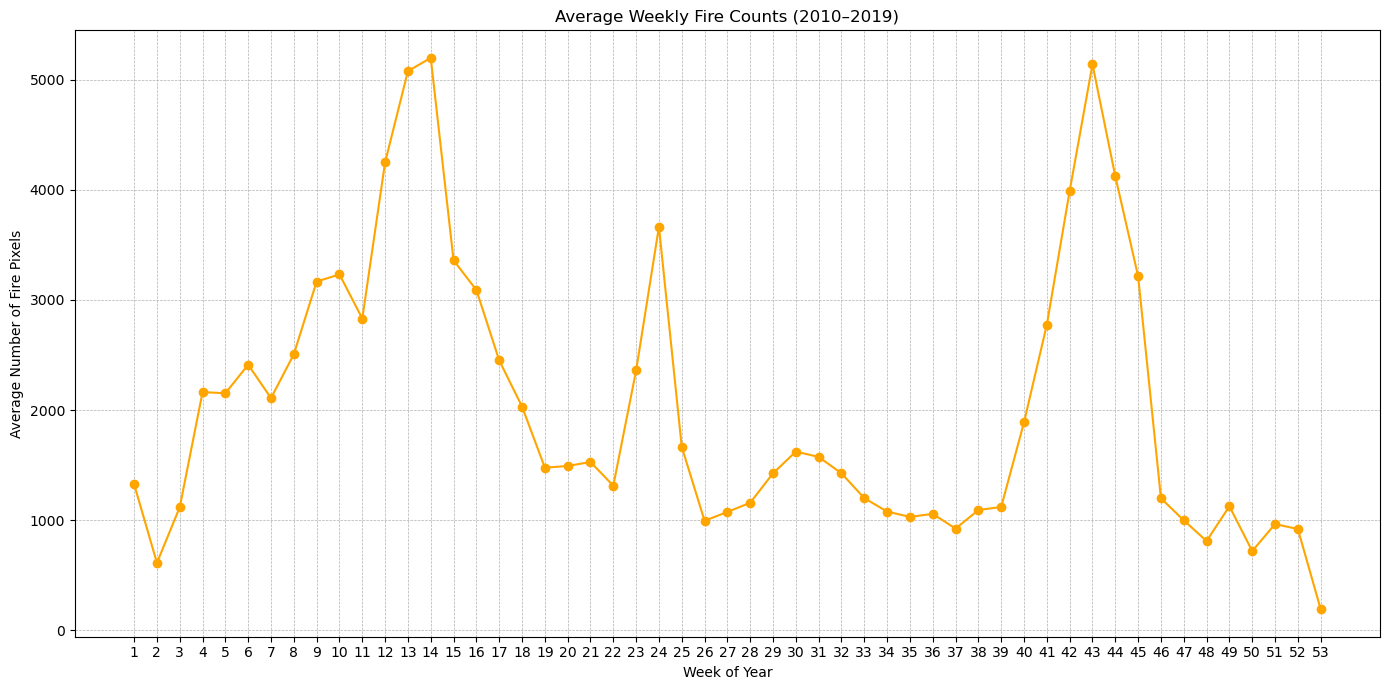

9-17周，23-25,40-45周火点高发


<Figure size 640x480 with 0 Axes>

In [4]:
#1
weekly_counts = df_all.groupby(['year', 'week_of_year']).size().reset_index(name='count')

weekly_avg = weekly_counts.groupby('week_of_year')['count'].mean()

weeks = weekly_avg.index
counts = weekly_avg.values

norm = Normalize(counts.min(), counts.max())
colors = plt.cm.YlOrRd(norm(counts))  # 使用 YlOrRd 映射

plt.figure(figsize=(14, 7))
bars = plt.bar(weeks, counts, color=colors)
plt.title('Average Weekly Fire Counts (2010–2019)')
plt.xlabel('Week of Year')
plt.ylabel('Average Number of Fire Pixels')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(weeks)

plt.tight_layout()
plt.savefig('average_weekly_fire_barchart.png')



#2
plt.figure(figsize=(14, 7))
plt.plot(weeks, counts, marker='o', linestyle='-', color='orange')  # 使用蓝色线条和圆点标记


plt.title('Average Weekly Fire Counts (2010–2019)')
plt.xlabel('Week of Year')
plt.ylabel('Average Number of Fire Pixels')


plt.xticks(range(1, 54))  # 设置 x 轴范围为 1 到 53


plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()
plt.savefig('average_weekly_fire_linechart.png')

print('9-17周，23-25,40-45周火点高发')



step4： 空间特征：地理位置与月度&周度数据结合--图表（四个季节：4*地理位置*季度总数）


In [5]:
print("原始列：", df_all.columns.tolist())
print(df_all['season'].value_counts())

df_all['lat_grid'] = (df_all['latitude'] // 0.5) * 0.5
df_all['lon_grid'] = (df_all['longitude'] // 0.5) * 0.5
df_all['region'] = df_all['lat_grid'].astype(str) + '_' + df_all['lon_grid'].astype(str)

# 确保都是字符串
df_all['region'] = df_all['region'].astype(str).str.strip()
df_all['season'] = df_all['season'].astype(str).str.strip()

seasonal_counts = df_all.groupby(['region', 'season']).size().reset_index(name='seasonal_fire_count')

# 再次确保类型一致
seasonal_counts['region'] = seasonal_counts['region'].astype(str).str.strip()
seasonal_counts['season'] = seasonal_counts['season'].astype(str).str.strip()


# 创建 {(region, season): count} 字典
seasonal_dict = seasonal_counts.set_index(['region', 'season'])['seasonal_fire_count'].to_dict()

# 给 df_all 每一行创建 key 并查表
keys = list(zip(df_all['region'], df_all['season']))
df_all['seasonal_fire_count'] = [seasonal_dict.get(key, 0) for key in keys]


print("检查 seasonal_fire_count 是否存在：")
print('seasonal_fire_count' in df_all.columns)

print("\n前10行数据：")
print(df_all[['region', 'season', 'seasonal_fire_count']].head(10))

print("\n各季节平均火点数：")
print(df_all.groupby('season')['seasonal_fire_count'].mean())


grid_centroids = seasonal_counts.copy()
grid_centroids[['lat_grid', 'lon_grid']] = grid_centroids['region'].str.split('_', expand=True).astype(float)
grid_centroids.rename(columns={'lat_grid': 'latitude', 'lon_grid': 'longitude'}, inplace=True)
grid_centroids = grid_centroids[['region', 'latitude', 'longitude', 'season', 'seasonal_fire_count']]

grid_centroids.to_csv('seasonal_fire_counts_for_arcgis.csv', index=False, encoding='utf-8')

print(" 成功导出：seasonal_fire_counts_for_arcgis.csv")

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
output_files = {season: f'{season.lower()}_fire_counts.csv' for season in seasons}

# 按季节拆分并保存为独立的CSV文件
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
for season in seasons:
    subset = df_all[df_all['season'] == season].reset_index(drop=True)
    filename = f"{season.lower()}_fire_counts.csv"
    subset.to_csv(filename, index=False, encoding='utf-8')
    print(f" 已导出: {filename}")

原始列： ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type', 'source_year', 'year', 'month', 'week_of_year', 'season']
Spring    384511
Autumn    283005
Summer    206574
Winter    199029
Name: season, dtype: int64
检查 seasonal_fire_count 是否存在：
True

前10行数据：
       region  season  seasonal_fire_count
0  30.5_120.0  Winter                   56
1  28.5_121.0  Winter                   28
2  27.0_102.0  Winter                  491
3  26.5_101.5  Winter                 3482
4  27.5_100.5  Winter                  114
5  22.0_101.5  Winter                   44
6  28.5_110.0  Winter                   21
7  29.5_112.0  Winter                   74
8  29.0_110.0  Winter                   39
9  32.0_112.5  Winter                   90

各季节平均火点数：
season
Autumn    683.003095
Spring    541.259504
Summer    545.239866
Winter    389.555155
Name: seasonal_fire_count, dtype: float64
 成功导出：se